In [370]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [371]:
SEED = 42

Primeramente vamos a crear los dataframes leyendo los CSV, con index_col = 0 para no extraer dicha columna

In [372]:
coords_dataframe = pd.read_csv("../data/rawData/coords_diamonds.csv", index_col= 0)

diamonds_dataframe = pd.read_csv("../data/rawData/diamonds.csv", index_col= 0)

stolen_diamonds_dataframe = pd.read_csv("../data/rawData/stolen_diamonds.csv")

In [373]:
stolen_diamonds_dataframe

,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates
0,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351"
1,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961"
2,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673"
3,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730"
4,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602"
5,0.90,Good,F,SI2,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874"
6,0.51,Ideal,D,VS1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080"
7,1.12,Ideal,G,VVS2,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950"
8,0.40,Ideal,G,VVS2,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473"
9,0.36,Premium,I,VS2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808"


A partir de esto, toca darle un vistazo inicial a los dataframes para determinar su estructura

In [374]:
coords_dataframe.head()

,latitude,longitude
0,39.8813889,-83.093056
1,33.4150000,-111.548889
2,40.1672222,-105.101389
3,37.3711111,-85.583056
4,48.5394444,-121.745000


In [375]:
coords_dataframe.describe()

,longitude
count,53930.000000
mean,-86.693792
std,39.773132
min,-173.985008
25%,-112.073333
50%,-87.889167
75%,-78.680278
max,178.017649


In [376]:
coords_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    53930 non-null  object 
 1   longitude   53930 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [377]:
diamonds_dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [378]:
diamonds_dataframe.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [379]:
diamonds_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    50968 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        52840 non-null  float64
 8   y        53345 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Vamos a crear un dataframe uniendo ambos, concatenando usando axis=1 para que se agreguen las columnas

In [380]:
data = pd.concat([coords_dataframe, diamonds_dataframe], axis=1)

Una vez esto, vamos a darle nuevamente una inspección al dataframe para comenzar con la exploración de los datos

In [381]:
data.head()

,latitude,longitude,carat,cut,color,clarity,depth,table,price,x,y,z
0,39.8813889,-83.093056,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,33.4150000,-111.548889,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,40.1672222,-105.101389,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,37.3711111,-85.583056,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,48.5394444,-121.745000,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [382]:
data.describe()

,longitude,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141
std,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000
25%,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    53930 non-null  object 
 1   longitude   53930 non-null  float64
 2   carat       53930 non-null  float64
 3   cut         53930 non-null  object 
 4   color       53930 non-null  object 
 5   clarity     53930 non-null  object 
 6   depth       50968 non-null  float64
 7   table       53930 non-null  float64
 8   price       53930 non-null  int64  
 9   x           52840 non-null  float64
 10  y           53345 non-null  float64
 11  z           53930 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 5.3+ MB


Vamos a revisar cuáles fueron las principales características con valores nulos

In [384]:
null_values = data.isna().sum()
print(null_values)

latitude         0
longitude        0
carat            0
cut              0
color            0
clarity          0
depth         2962
table            0
price            0
x             1090
y              585
z                0
dtype: int64


Para poder arreglar dichos valores nulos, es necesario segmentarlos en datos categóricos y datos numéricos

In [385]:
data_numerical_features = data.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(data_numerical_features)

['longitude ', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [386]:
data_categorical_features = data.drop(columns=data_numerical_features).columns.tolist()
print(data_categorical_features)

['latitude', 'cut', 'color', 'clarity']


### Data Cleaning

Primeramente, vamos a revisar los datos categóricos por si en ellos existen valores numéricos mal parseados

In [387]:
categorical_features = data[data_categorical_features]

In [388]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   latitude  53930 non-null  object
 1   cut       53930 non-null  object
 2   color     53930 non-null  object
 3   clarity   53930 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [389]:
categorical_features.describe()

,latitude,cut,color,clarity
count,53930,53930,53930,53930
unique,15210,26,26,30
top,47.6063889,Ideal,G,SI1
freq,398,21537,11284,13058


In [390]:
categorical_features.head()

,latitude,cut,color,clarity
0,39.8813889,Ideal,E,SI2
1,33.4150000,Premium,E,SI1
2,40.1672222,Good,E,VS1
3,37.3711111,Premium,I,VS2
4,48.5394444,Good,J,SI2


In [391]:
data_categorical_features.remove('latitude')

In [392]:
categorical_features.head()

,latitude,cut,color,clarity
0,39.8813889,Ideal,E,SI2
1,33.4150000,Premium,E,SI1
2,40.1672222,Good,E,VS1
3,37.3711111,Premium,I,VS2
4,48.5394444,Good,J,SI2


In [393]:
categorical_features = data[data_categorical_features]

In [394]:
data_numerical_features.append('latitude')

Será necesario convertir los valores a numéricos, y con regex nos aseguraremos de que en efecto sólo sean números en tal columna de latitude

In [395]:
data[data_numerical_features] = data[data_numerical_features].replace('[a-zA-Z]+', '', regex=True).apply(pd.to_numeric)

Vamos a corregir los valores numéricos

In [396]:
numerical_features = data[data_numerical_features]

In [397]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   53930 non-null  float64
 1   carat       53930 non-null  float64
 2   depth       50968 non-null  float64
 3   table       53930 non-null  float64
 4   price       53930 non-null  int64  
 5   x           52840 non-null  float64
 6   y           53345 non-null  float64
 7   z           53930 non-null  float64
 8   latitude    53930 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.1 MB


In [398]:
numerical_features.describe()

,longitude,carat,depth,table,price,x,y,z,latitude
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141,38.137352
std,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909,10.485185
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,-82.862752
25%,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,34.147778
50%,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,39.457778
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000,42.800556
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000


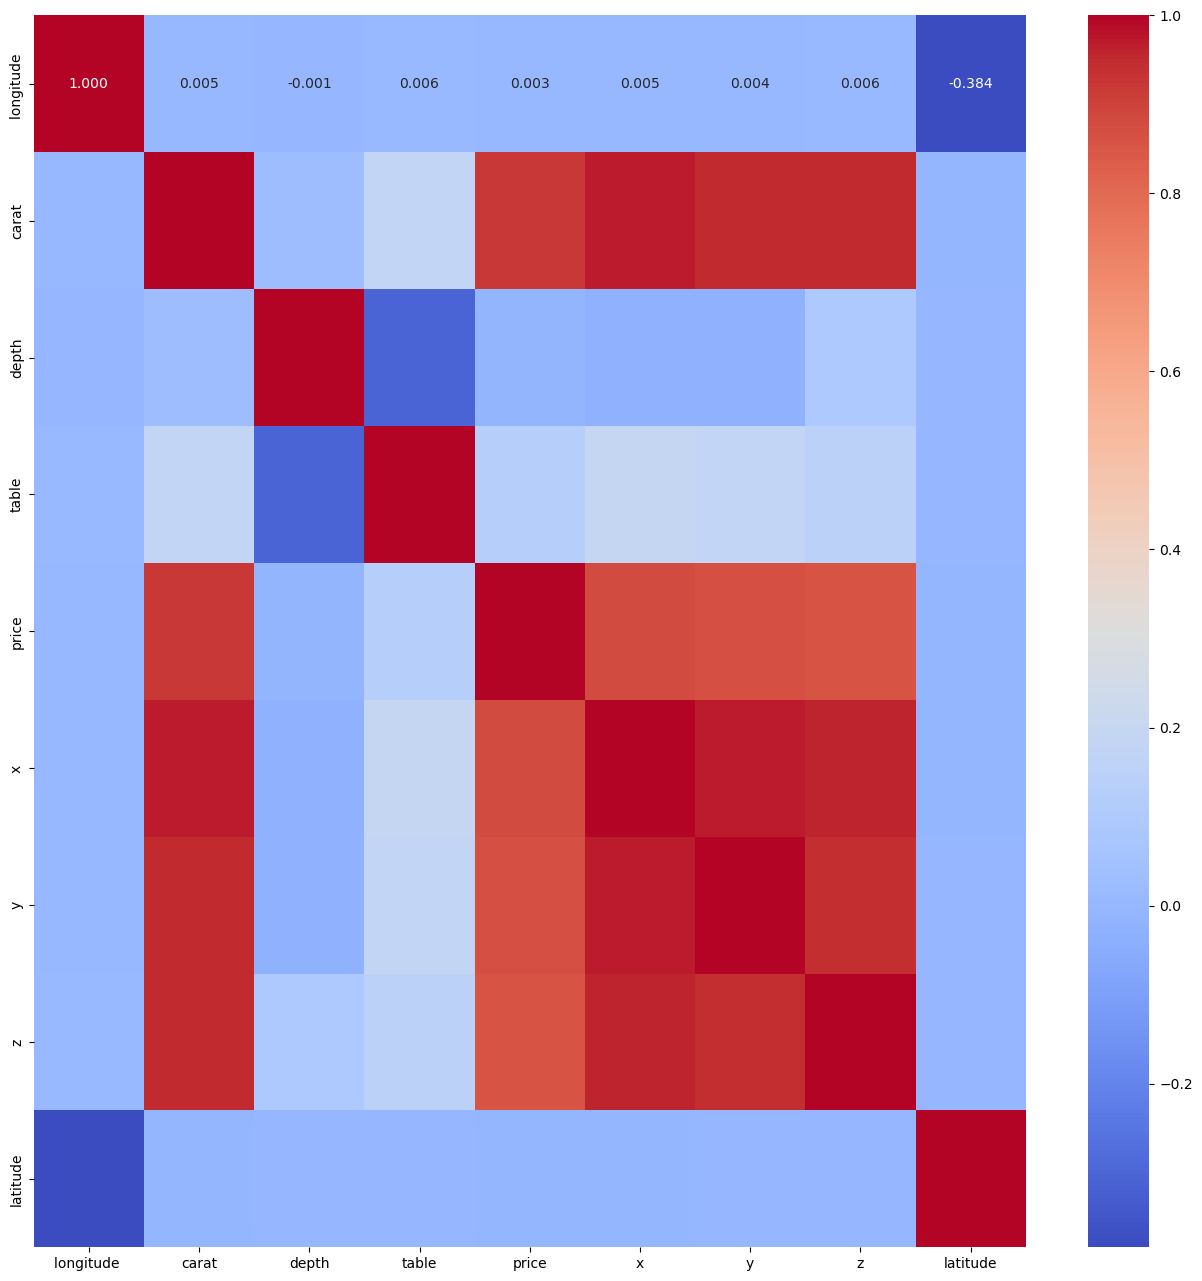

In [431]:
plt.figure(figsize=(16, 16))
sns.heatmap(numerical_features.corr(), cmap="coolwarm",annot=True, fmt='.3f')

plt.show()

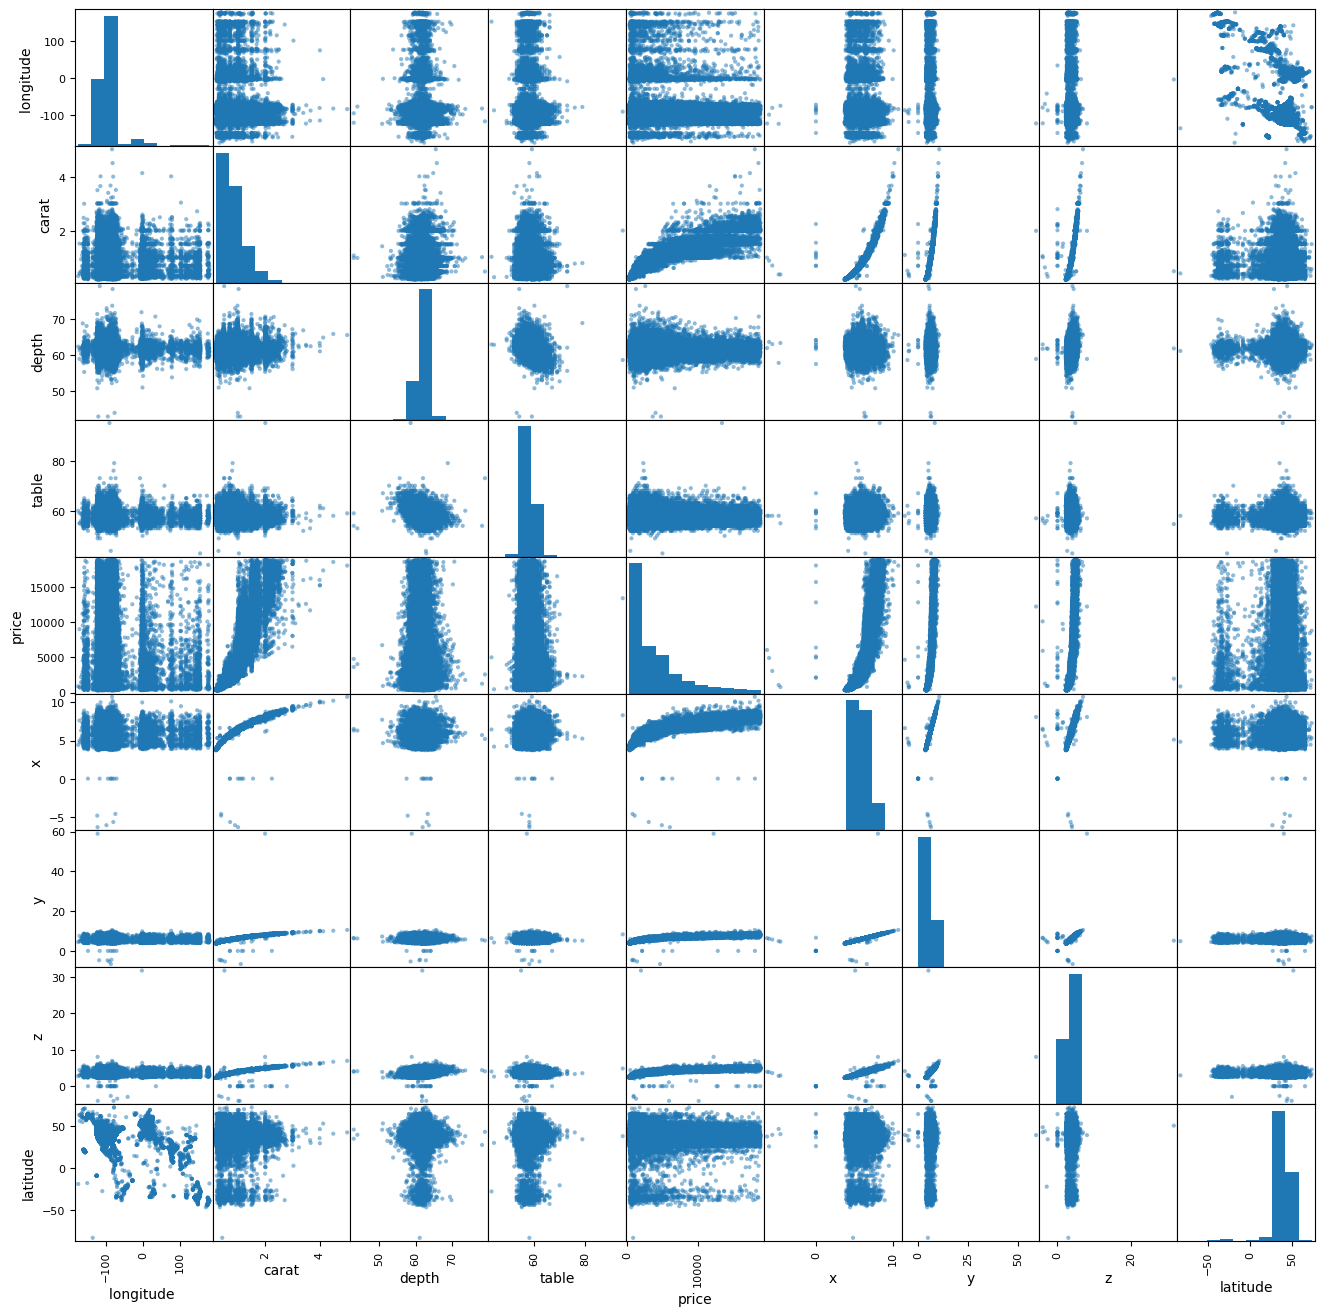

In [400]:
scatter_matrix(numerical_features, figsize=(16,16))
plt.show()

Vamos a analizar los valores nulos de la tabla numérica, y vamos a proceder a realizar la imputación 

In [401]:
numerical_features.isnull().sum()

longitude        0
carat            0
depth         2962
table            0
price            0
x             1090
y              585
z                0
latitude         0
dtype: int64

In [402]:
numerical_features.corr()

,longitude,carat,depth,table,price,x,y,z,latitude
longitude,1.000000,0.005164,-0.000526,0.006203,0.003459,0.005235,0.004246,0.006200,-0.383748
carat,0.005164,1.000000,0.028599,0.181638,0.921590,0.970562,0.952661,0.949214,-0.006410
depth,-0.000526,0.028599,1.000000,-0.297398,-0.009819,-0.025196,-0.028852,0.094398,-0.000065
table,0.006203,0.181638,-0.297398,1.000000,0.127168,0.194687,0.184021,0.150726,-0.000583
price,0.003459,0.921590,-0.009819,0.127168,1.000000,0.880248,0.866186,0.857288,-0.005710
x,0.005235,0.970562,-0.025196,0.194687,0.880248,1.000000,0.970882,0.961530,-0.006357
y,0.004246,0.952661,-0.028852,0.184021,0.866186,0.970882,1.000000,0.947350,-0.005490
z,0.006200,0.949214,0.094398,0.150726,0.857288,0.961530,0.947350,1.000000,-0.003223
latitude,-0.383748,-0.006410,-0.000065,-0.000583,-0.005710,-0.006357,-0.005490,-0.003223,1.000000


Podemos ver que la mayor correlación existente para los valores de X y Y, son carat, precio, X, Y y Z. Podemos usar esos parámetros para imputar los datos a partir de una iteración.

In [403]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [404]:
features_to_impute = ['x', 'y', 'z', 'carat', 'price']

In [405]:
data_to_impute_numerical = data[features_to_impute]

In [406]:
data_to_impute_numerical.head()

,x,y,z,carat,price
0,3.95,3.98,2.43,0.23,326
1,3.89,3.84,2.31,0.21,326
2,4.05,4.07,2.31,0.23,327
3,4.20,4.23,2.63,0.29,334
4,4.34,4.35,2.75,0.31,335


In [407]:
imputer = IterativeImputer(random_state=SEED)

In [408]:
imputed = imputer.fit_transform(data_to_impute_numerical)

In [409]:
df_imputed = pd.DataFrame(imputed, columns=data_to_impute_numerical.columns)

In [410]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       53930 non-null  float64
 1   y       53930 non-null  float64
 2   z       53930 non-null  float64
 3   carat   53930 non-null  float64
 4   price   53930 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


In [411]:
df_imputed.describe()

,x,y,z,carat,price
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,5.730226,5.733159,3.538141,0.797976,3933.054942
std,1.124319,1.136642,0.708909,0.474035,3989.628569
min,-6.370000,-6.610000,-4.060000,0.200000,326.000000
25%,4.720000,4.730000,2.910000,0.400000,950.000000
50%,5.690000,5.710000,3.530000,0.700000,2401.000000
75%,6.540000,6.530000,4.040000,1.040000,5325.000000
max,10.740000,58.900000,31.800000,5.010000,18823.000000


In [412]:
numerical_features.describe()

,longitude,carat,depth,table,price,x,y,z,latitude
count,53930.000000,53930.000000,50968.000000,53930.000000,53930.000000,52840.000000,53345.000000,53930.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730617,5.733112,3.538141,38.137352
std,39.773132,0.474035,1.432949,2.234578,3989.628569,1.127572,1.141865,0.708909,10.485185
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,-82.862752
25%,-112.073333,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,34.147778
50%,-87.889167,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,39.457778
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000,42.800556
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000


Podemos observar que el cambio de la media y desviación estándar ha cambiado muy poco con los nuevos valores añadidos 

In [413]:
numerical_features_imputed = numerical_features.copy()

In [414]:
numerical_features[features_to_impute] = df_imputed

C:\Users\Alan_Lopez\AppData\Local\Temp\ipykernel_17952\4117680637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[features_to_impute] = df_imputed


In [415]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   53930 non-null  float64
 1   carat       53930 non-null  float64
 2   depth       50968 non-null  float64
 3   table       53930 non-null  float64
 4   price       53930 non-null  float64
 5   x           53930 non-null  float64
 6   y           53930 non-null  float64
 7   z           53930 non-null  float64
 8   latitude    53930 non-null  float64
dtypes: float64(9)
memory usage: 4.1 MB


Ahora lo que haremos será imputar los valores de depth, que podemos ver tiene una fuerte correlación inversa con table, por lo que usaremos este parámetro para la imputación

In [416]:
dataframe_depth_table = numerical_features[['depth', 'table']]

In [417]:
imputed = imputer.fit_transform(dataframe_depth_table)
df_imputed_depth = pd.DataFrame(imputed, columns=dataframe_depth_table.columns)

In [418]:
numerical_features[dataframe_depth_table.columns] = df_imputed_depth

C:\Users\Alan_Lopez\AppData\Local\Temp\ipykernel_17952\3139702632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features[dataframe_depth_table.columns] = df_imputed_depth


In [419]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   53930 non-null  float64
 1   carat       53930 non-null  float64
 2   depth       53930 non-null  float64
 3   table       53930 non-null  float64
 4   price       53930 non-null  float64
 5   x           53930 non-null  float64
 6   y           53930 non-null  float64
 7   z           53930 non-null  float64
 8   latitude    53930 non-null  float64
dtypes: float64(9)
memory usage: 4.1 MB


In [420]:
numerical_features.describe()

,longitude,carat,depth,table,price,x,y,z,latitude
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,-86.693792,0.797976,61.749425,57.457328,3933.054942,5.730226,5.733159,3.538141,38.137352
std,39.773132,0.474035,1.396752,2.234578,3989.628569,1.124319,1.136642,0.708909,10.485185
min,-173.985008,0.200000,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,-82.862752
25%,-112.073333,0.400000,61.100000,56.000000,950.000000,4.720000,4.730000,2.910000,34.147778
50%,-87.889167,0.700000,61.836716,57.000000,2401.000000,5.690000,5.710000,3.530000,39.457778
75%,-78.680278,1.040000,62.500000,59.000000,5325.000000,6.540000,6.530000,4.040000,42.800556
max,178.017649,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,72.700000


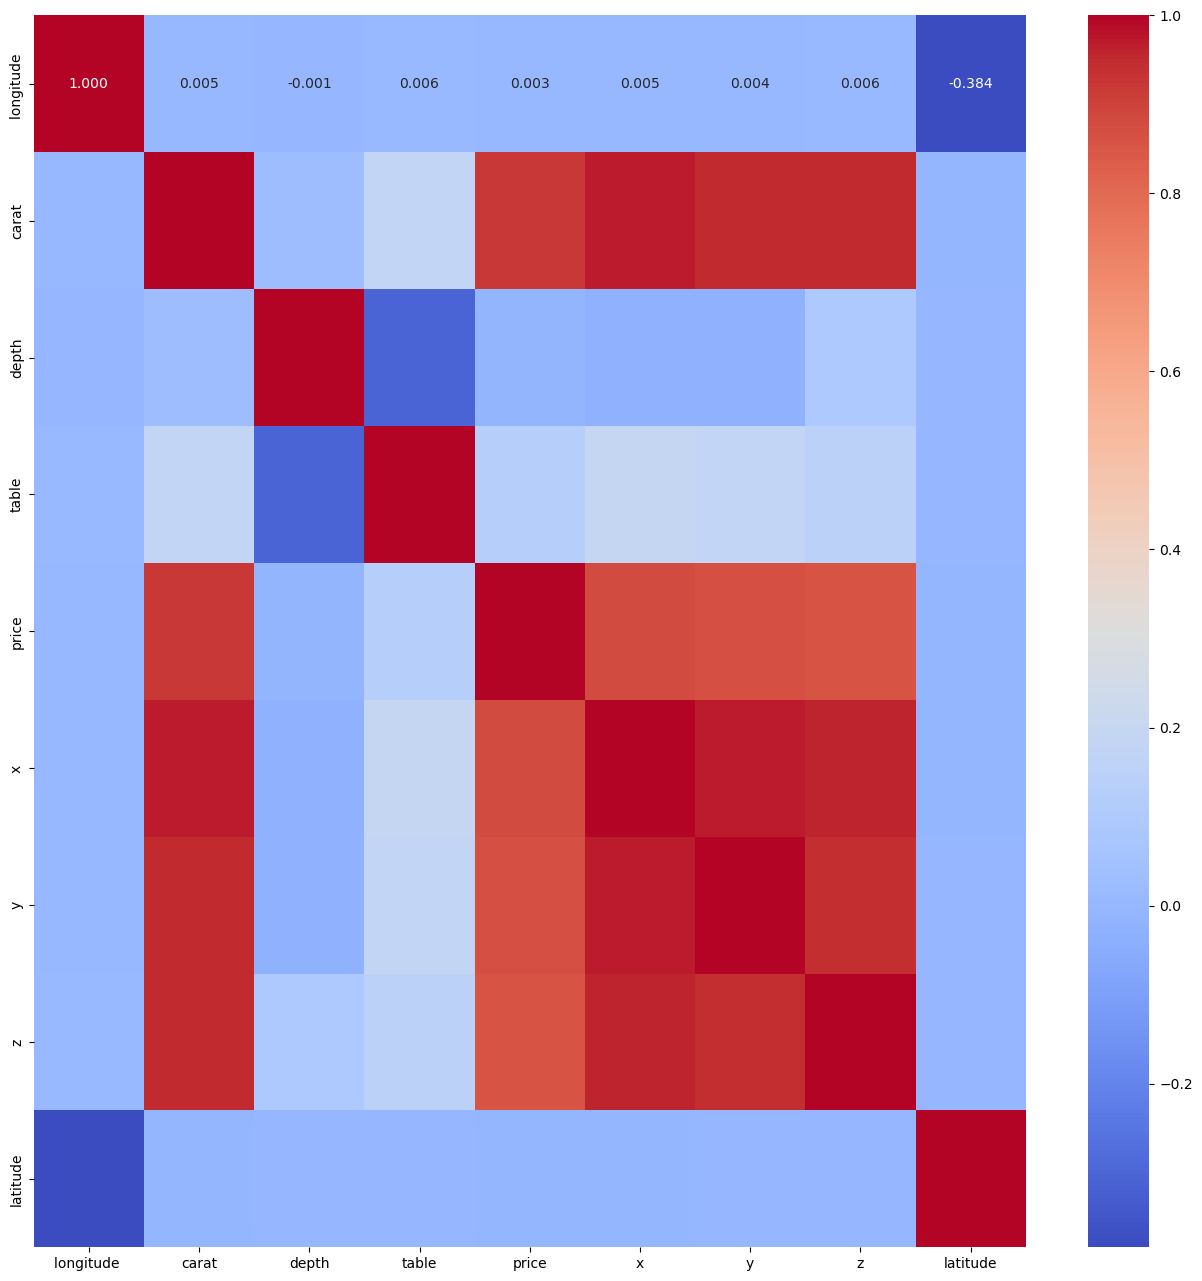

In [432]:
plt.figure(figsize=(16, 16))
sns.heatmap(numerical_features.corr(), cmap="coolwarm",annot=True, fmt='.3f')

plt.show()

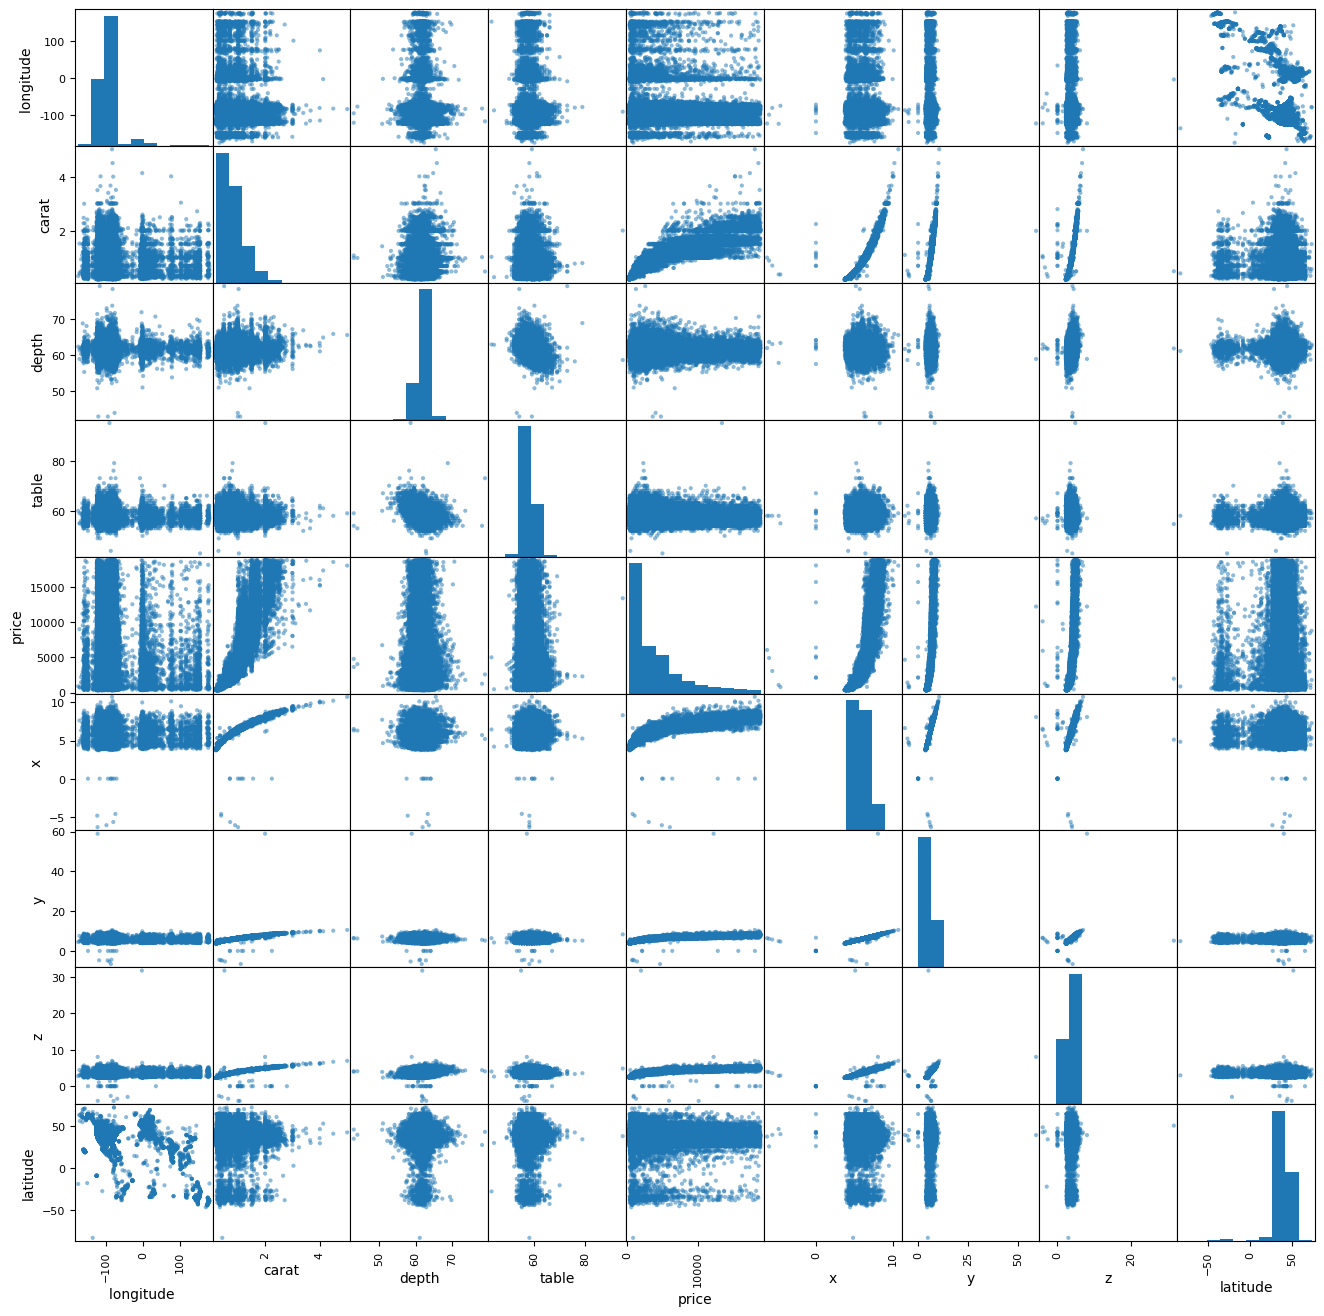

In [422]:
scatter_matrix(numerical_features, figsize=(16,16))
plt.show()

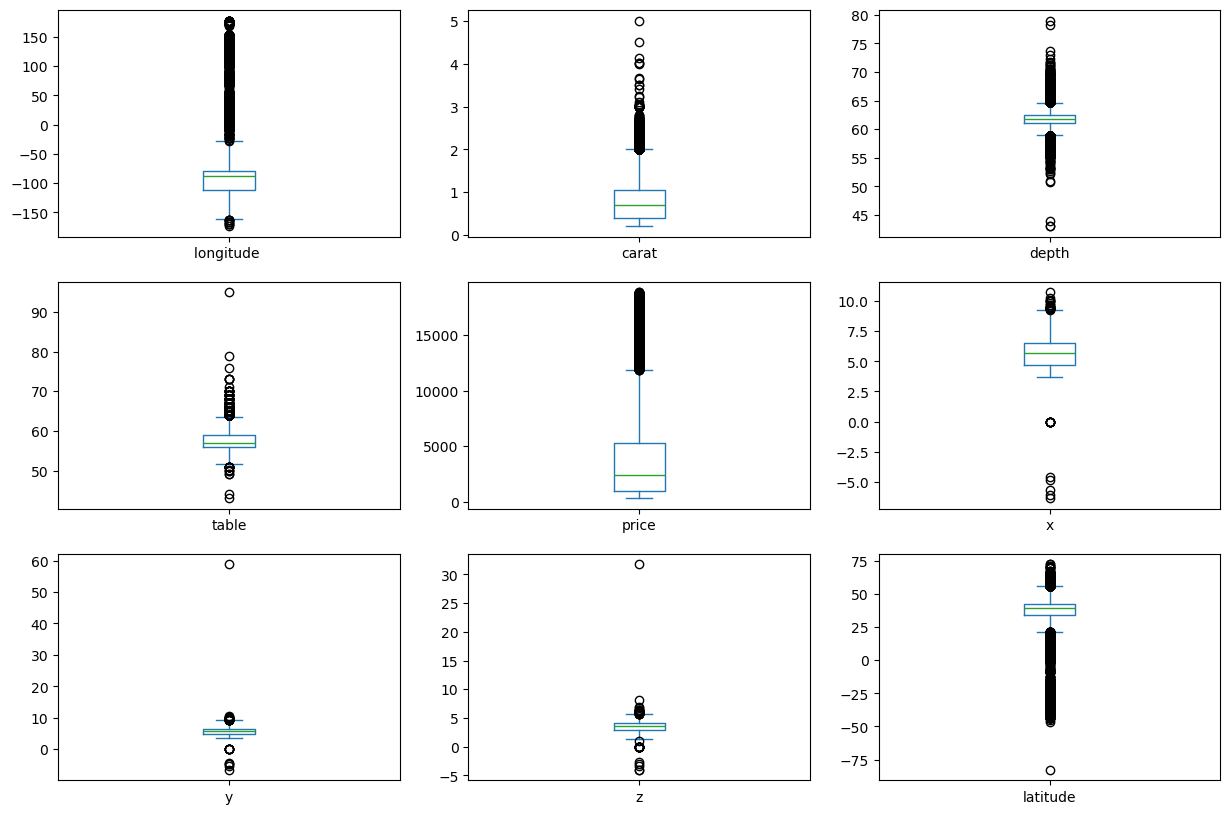

In [423]:
numerical_features.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

Como se observó, X, Y y Z tienen una gran correlación entre sí, por lo que sería ideal utilizar PCA para simplificar el model

In [436]:
correlated_colums = ['x', 'y', 'z']

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(numerical_features[correlated_colums].values)
numerical_pca = pca.transform(numerical_features[correlated_colums].values)
numerical_pca = pd.DataFrame(numerical_pca, columns=['Component 1', 'Component 2'])

In [438]:
numerical_features['component_xyz_1'] = numerical_pca['Component 1'].values
numerical_features['component_xyz_2'] = numerical_pca['Component 2'].values

C:\Users\Alan_Lopez\AppData\Local\Temp\ipykernel_17952\2460315744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features['component_xyz_1'] = numerical_pca['Component 1'].values
C:\Users\Alan_Lopez\AppData\Local\Temp\ipykernel_17952\2460315744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features['component_xyz_2'] = numerical_pca['Component 2'].values


In [439]:
numerical_features

,longitude,carat,depth,table,price,x,y,z,latitude,component_xyz_1,component_xyz_2
0,-83.093056,0.23,61.50000,55.0,326.0,3.950000,3.980000,2.43,39.881389,-2.733031,0.035800
1,-111.548889,0.21,59.80000,61.0,326.0,3.890000,3.840000,2.31,33.415000,-2.910794,0.022644
2,-105.101389,0.23,56.90000,65.0,327.0,4.050000,4.070000,2.31,40.167222,-2.657706,0.126932
3,-85.583056,0.29,62.40000,58.0,334.0,4.200000,4.230000,2.63,37.371111,-2.329054,0.009365
4,-121.745000,0.31,63.30000,58.0,335.0,4.340000,4.350000,2.75,48.539444,-2.112660,-0.024491
...,...,...,...,...,...,...,...,...,...,...,...
53925,-121.493333,0.72,60.80000,57.0,2757.0,5.750000,5.760000,3.50,38.581667,0.015038,0.032522
53926,-111.222442,0.72,63.10000,55.0,2757.0,5.690000,5.750000,3.61,32.436381,0.013649,-0.010560
53927,-75.284167,0.70,62.80000,60.0,2757.0,5.660000,5.680000,3.56,40.241389,-0.071244,-0.022590
53928,-122.721944,0.86,61.00000,58.0,2757.0,6.150000,6.120000,3.74,38.822222,0.603452,0.004467


Ahora vamos a quitar las features X, Y y Z

In [440]:
numerical_features = numerical_features.drop(['x', 'y', 'z'], axis=1)

In [441]:
numerical_features

,longitude,carat,depth,table,price,latitude,component_xyz_1,component_xyz_2
0,-83.093056,0.23,61.50000,55.0,326.0,39.881389,-2.733031,0.035800
1,-111.548889,0.21,59.80000,61.0,326.0,33.415000,-2.910794,0.022644
2,-105.101389,0.23,56.90000,65.0,327.0,40.167222,-2.657706,0.126932
3,-85.583056,0.29,62.40000,58.0,334.0,37.371111,-2.329054,0.009365
4,-121.745000,0.31,63.30000,58.0,335.0,48.539444,-2.112660,-0.024491
...,...,...,...,...,...,...,...,...
53925,-121.493333,0.72,60.80000,57.0,2757.0,38.581667,0.015038,0.032522
53926,-111.222442,0.72,63.10000,55.0,2757.0,32.436381,0.013649,-0.010560
53927,-75.284167,0.70,62.80000,60.0,2757.0,40.241389,-0.071244,-0.022590
53928,-122.721944,0.86,61.00000,58.0,2757.0,38.822222,0.603452,0.004467


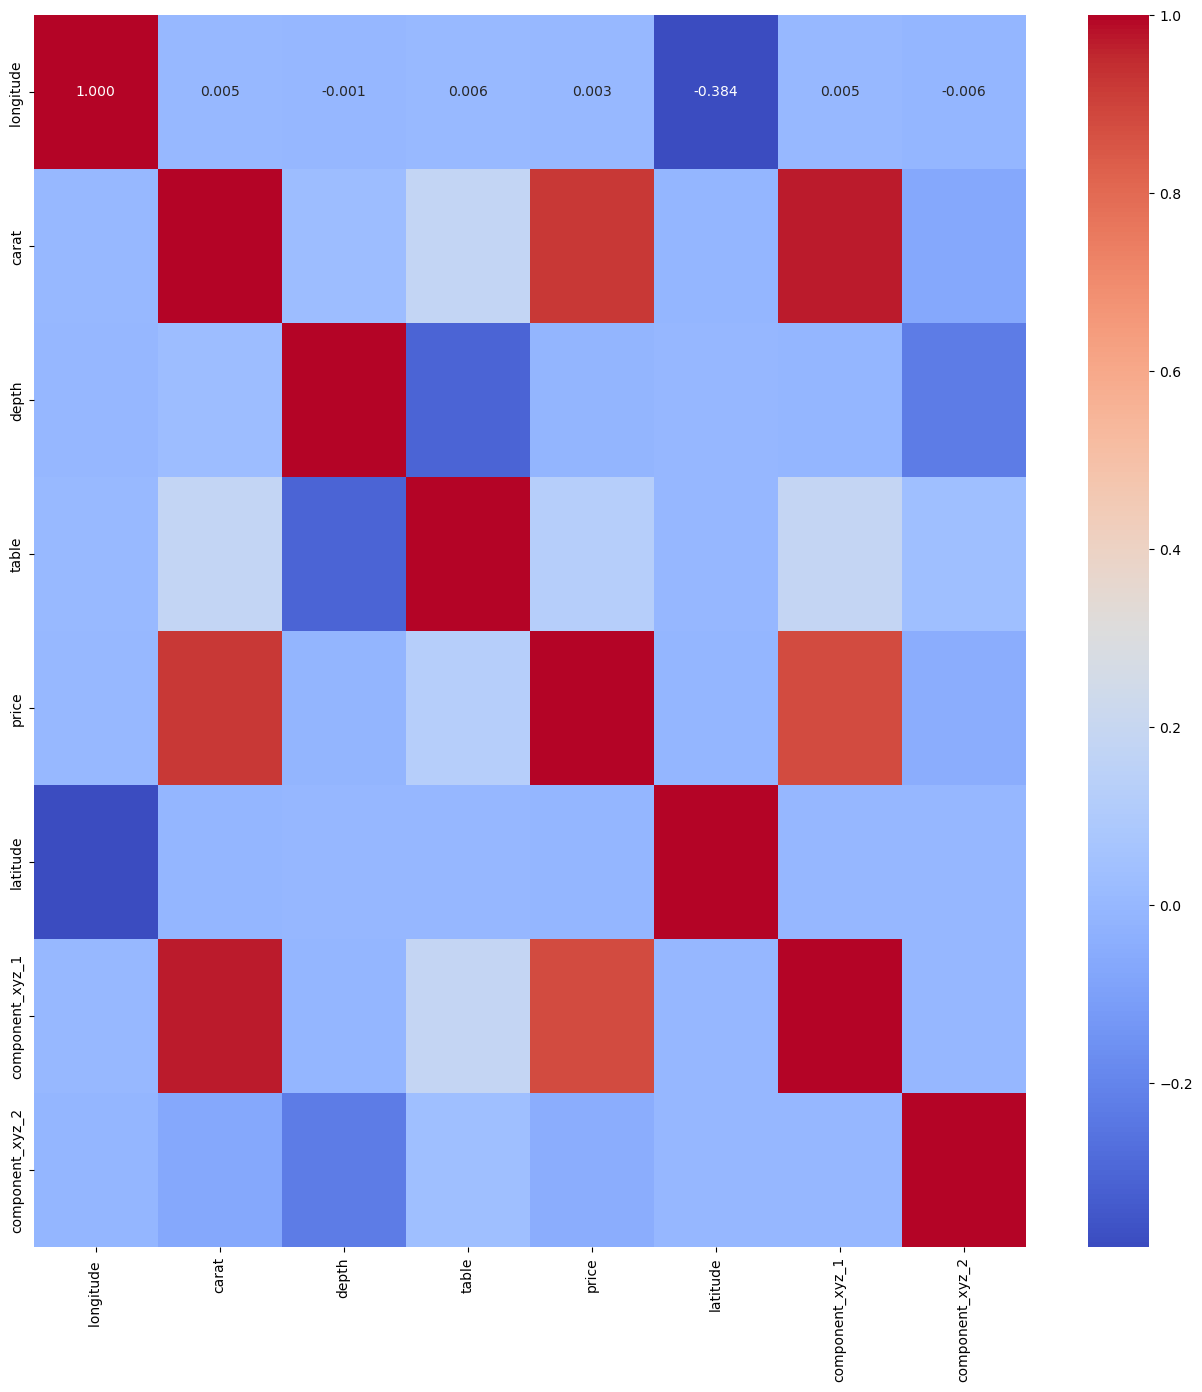

In [442]:
plt.figure(figsize=(16, 16))
sns.heatmap(numerical_features.corr(), cmap="coolwarm",annot=True, fmt='.3f')

plt.show()

Ahora mismo vamos a trabajar con los datos categóricos. Primeramente analizaremos su estructura para determinar que no existan valores con caracteres innecesarios.

In [445]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53930 entries, 0 to 53929
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      53930 non-null  object
 1   color    53930 non-null  object
 2   clarity  53930 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [446]:
for column in data_categorical_features:
    print(f'{column}: ', categorical_features[column].unique())

cut:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'Very Goo!d' "P*'remium"
 'I#deal' '#Very Good' 'P?remium' "*'Ideal" '!Good' 'Pre!mium' 'Pr?emium'
 'Very Go#od' 'Ide&al' 'Ide!al' 'Id!eal' '&Premium' 'Go?od' 'G#ood'
 "Very *'Good" "Ide*'al" 'V&ery Good' '&Ideal' 'Very G#ood']
color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D' "*'E" '#F' '&G' '!H' '?J' '#D' '&I' '!I' '?G'
 '#H' '?H' '?E' "*'F" '!E' '&F' '#G' "*'I" '!F' '&E']
clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF' 'S?I1' 'SI!1' '&VS2'
 '&SI2' "S*'I1" 'VS?1' "S*'I2" '#VS1' 'V&S2' 'V!S2' '!VS2' 'VS#2' "VVS*'2"
 "*'SI2" 'VV?S1' 'S&I1' "*'SI1" 'SI?1' 'VV#S1' 'V#S2' '#SI!1' 'S!I2']


En efecto, podemos ver una enorme cantidad de caracteres especiales que deberían ser eliminados. Para esto podemos usar regex y sólo extraer letras y números

In [458]:
categorical_features_to_fix = categorical_features.copy()

In [459]:
categorical_features_to_fix.columns = categorical_features.columns.str.replace('[^A-Za-z0-9]', '', regex=True)

In [462]:
for column in categorical_features_to_fix:
    categorical_features_to_fix[column] = categorical_features_to_fix[column].str.replace('[^A-Za-z0-9]', '', regex=True)

for column in categorical_features_to_fix:
    print(f'{column}: ', categorical_features_to_fix[column].unique())

cut:  ['Ideal' 'Premium' 'Good' 'VeryGood' 'Fair']
color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [465]:
categorical_features = categorical_features_to_fix

Ahora haremos one hot encoding  para las columnas de color y clarity. Para la columna de cut haremos un categorical encoding.

In [ ]:
categorical_features